In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

/tmp/ipython-input-2540900371.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2018-01-01', end='2025-12-05')
[*********************100%***********************]  1 of 1 completed


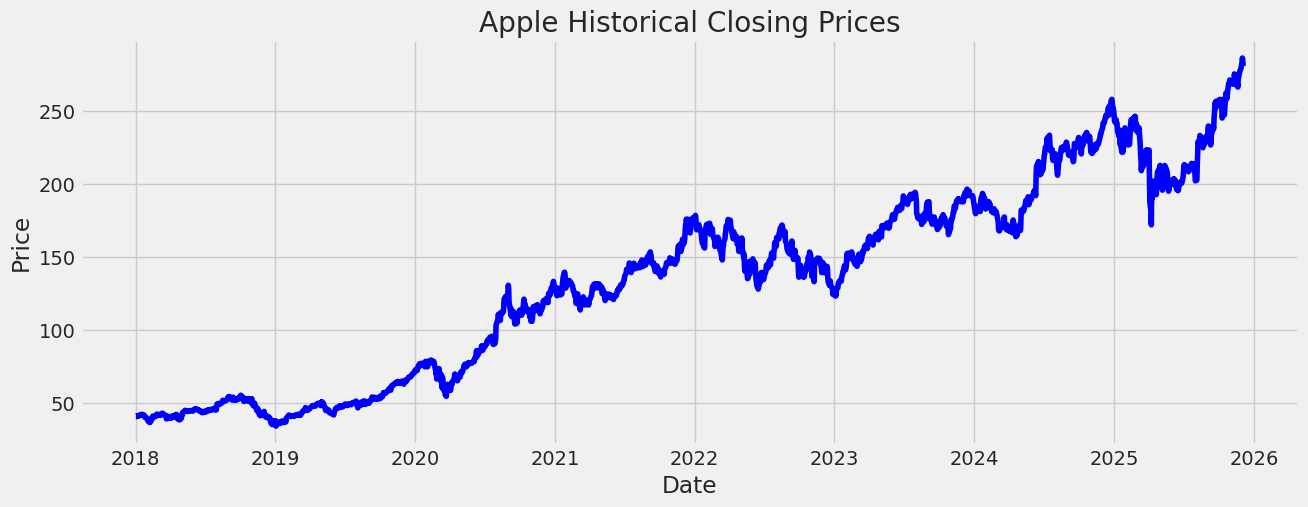

In [ ]:
ticker = "AAPL"
name = "Apple"

# Download historical data
df = yf.download(ticker, start='2018-01-01', end='2025-12-05')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# Plot historical closing price
plt.figure(figsize=(14,5))
plt.plot(df['Close'], color='blue')
plt.title(f"{name} Historical Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



In [ ]:
# Features to create
feature_funcs = {
    "HL_PCT": lambda df: (df['High'] - df['Low']) / df['Close'] * 100,
    "PCT_change": lambda df: (df['Close'] - df['Open']) / df['Open'] * 100,
    "MA_10": lambda df: df['Close'].rolling(10).mean(),
    "MA_30": lambda df: df['Close'].rolling(30).mean(),
    "STD_10": lambda df: df['Close'].rolling(10).std()
}

# Create features
for feat_name, func in feature_funcs.items():
    df[feat_name] = func(df)

df = df.dropna()



In [ ]:
features = ['Open', 'High', 'Low', 'Volume'] + list(feature_funcs.keys())
target = "Close"

X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"{name} Random Forest -> RMSE: {rmse:.2f}, R2: {r2:.2f}")


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Apple Random Forest -> RMSE: 37.39, R2: -1.95


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"{name} Random Forest -> RMSE: {rmse:.2f}, R2: {r2:.2f}")



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Apple Random Forest -> RMSE: 37.39, R2: -1.95


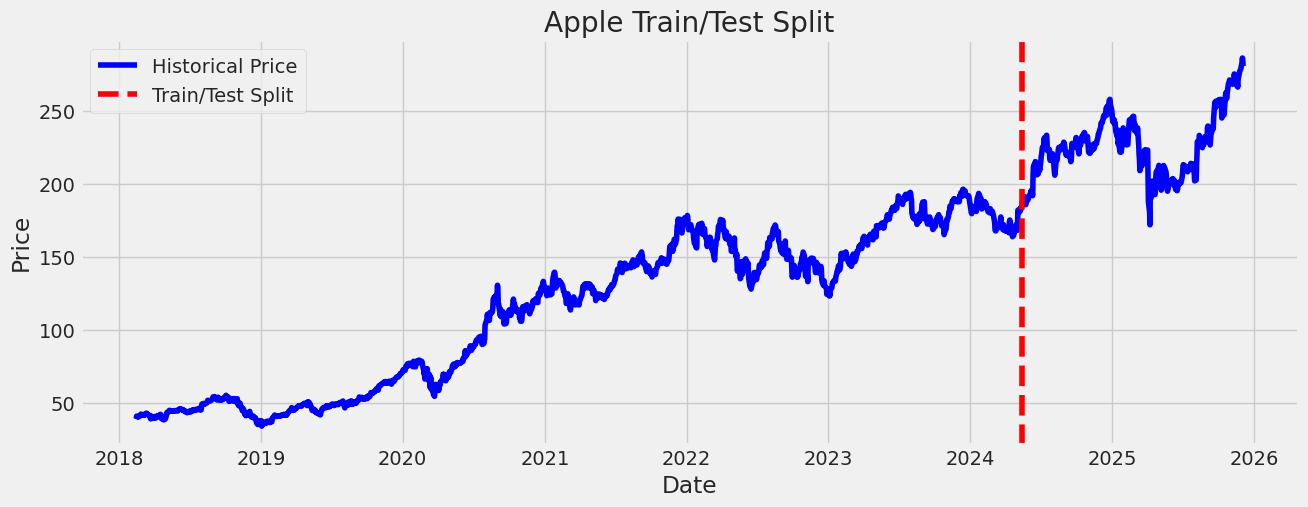

In [ ]:
# Train/Test Split Plot
plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Historical Price', color='blue')
plt.axvline(x=df.index[int(len(df)*0.8)], color='red', linestyle='--', label='Train/Test Split')
plt.title(f"{name} Train/Test Split")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




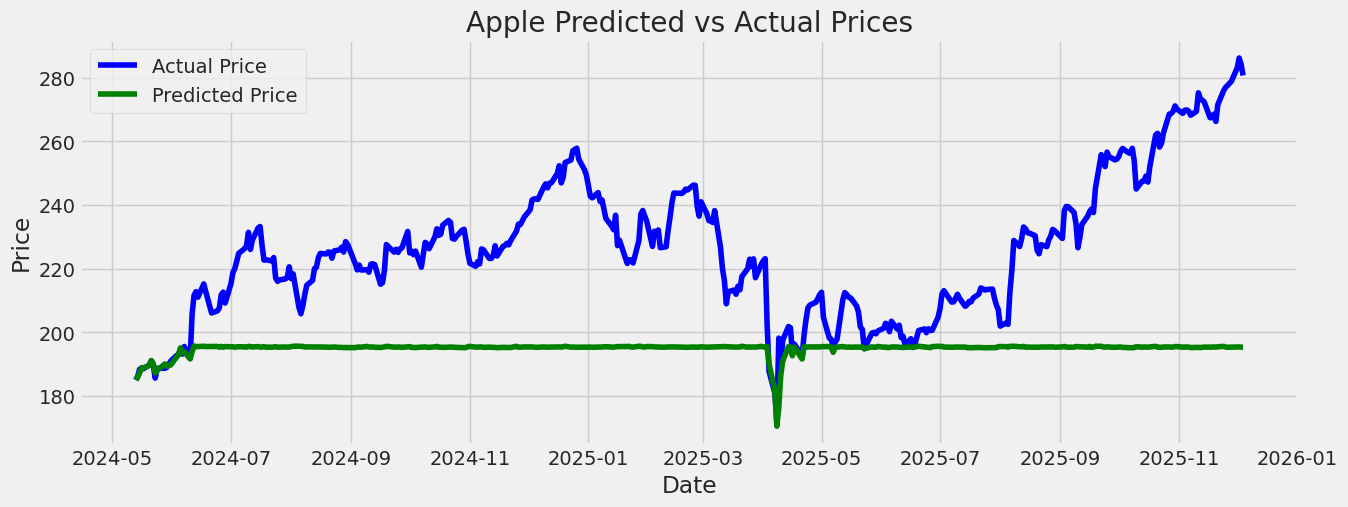

In [ ]:
# Predicted vs Actual
plt.figure(figsize=(14,5))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Price', color='green')
plt.title(f"{name} Predicted vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

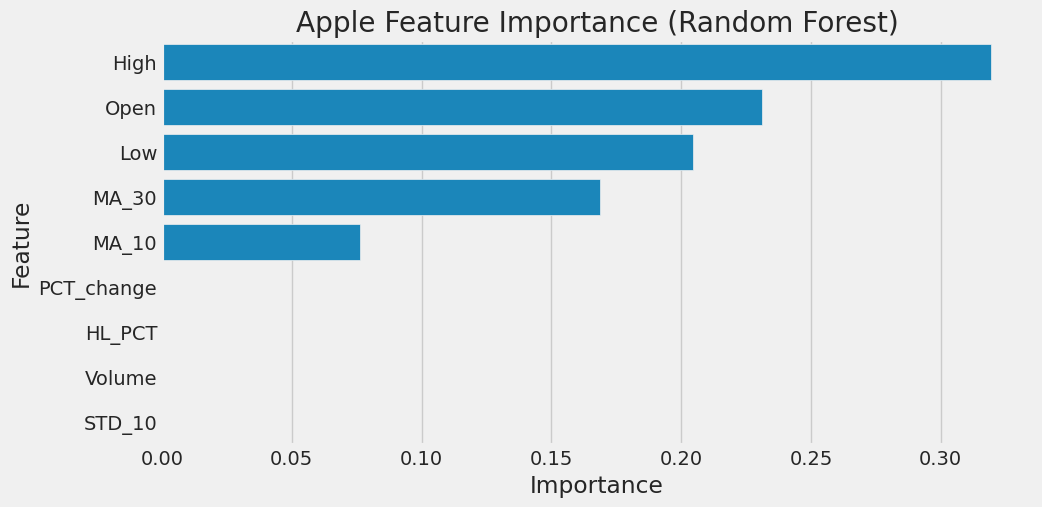

In [ ]:
# Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title(f"{name} Feature Importance (Random Forest)")
plt.show()



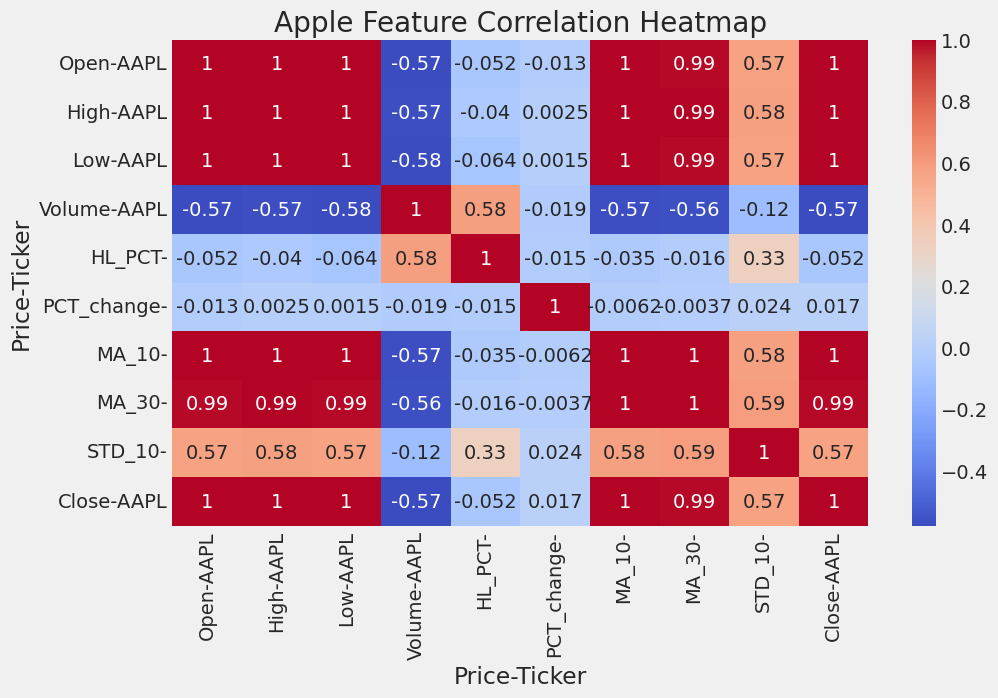

In [ ]:

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title(f"{name} Feature Correlation Heatmap")
plt.show()